# Introduction

In the data-driven age of education, the ability to translate raw student data into meaningful insights is indispensable. This project undertakes a comprehensive Exploratory Data Analysis (EDA) of a real-world dataset sourced from a student admission record. With 37 entries and 8 key features including demographics (sex, religion), academic performance (% of marks at previous school), and institutional history (previous school name, date of admission), this dataset offers a snapshot into the academic and sociocultural composition of a student cohort.

The primary aim of this analysis is to unearth patterns, detect anomalies, assess data distributions, and derive insights that may inform strategic decisions in education management. Techniques such as data cleaning, visualization (bar plots, box plots, KDE plots), categorical mapping, and correlation analysis have been employed to understand not just what the data contains, but what it conveys.

This EDA goes beyond mere summary statistics—it questions gender and religious disparities in academic performance, evaluates school-wise contribution to student intake, and visualizes how marks vary across roll numbers. The analysis also considers data normalization and outlier detection to ensure robustness. This is not just a statistical examination, but a narrative discovery grounded in the real experiences of students.

In [1]:
# import the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the dataset
df=pd.read_csv("Student Strength(CSV).csv")

In [3]:
# Check the head
df.head()

,Sl No,Roll No,Name of Student,Date of Admission,Sex,Religion,Previous School Name,% of Marks scored at Previous school
0,1,1,Moushali Guchhait,12-12-2024,Female,Hindu,New Admission,91.56
1,2,3,Sayan Das,12/13/2024,Male,Hindu,Dadanpatrabarh Primary School,91.25
2,3,4,Atanu Khutiya,12/14/2024,Male,Hindu,New Admission,91.00
3,4,5,Rekha Khatun,12/14/2024,Female,Muslim,New Admission,90.75
4,5,6,Anupam Bangal,12/16/2024,Male,Hindu,New Admission,90.25


In [4]:
# Check the shape
df.shape

(37, 8)

In [6]:
# describe the dataset
df.describe()

,Sl No,Roll No,% of Marks scored at Previous school
count,37.000000,37.000000,37.000000
mean,19.000000,21.972973,61.884054
std,10.824355,12.063458,23.711134
min,1.000000,1.000000,33.000000
25%,10.000000,11.000000,35.500000
50%,19.000000,23.000000,61.000000
75%,28.000000,32.000000,88.250000
max,37.000000,41.000000,91.560000


In [7]:
# information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 8 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Sl No                                 37 non-null     int64  
 1   Roll No                               37 non-null     int64  
 2   Name of Student                       37 non-null     object 
 3   Date of Admission                     37 non-null     object 
 4   Sex                                   37 non-null     object 
 5   Religion                              37 non-null     object 
 6   Previous School Name                  37 non-null     object 
 7   % of Marks scored at Previous school  37 non-null     float64
dtypes: float64(1), int64(2), object(5)
memory usage: 2.4+ KB


In [8]:
# Check the null values
df.isnull().sum()

,0
Sl No,0
Roll No,0
Name of Student,0
Date of Admission,0
Sex,0
Religion,0
Previous School Name,0
% of Marks scored at Previous school,0


In [10]:
# Check the columns
df.columns

Index(['Sl No', 'Roll No', 'Name of Student', 'Date of Admission', 'Sex',
       'Religion', 'Previous School Name',
       '% of Marks scored at Previous school'],
      dtype='object')

In [17]:
# Drop the column
df.drop(columns=["Sl No"],inplace=True)

In [18]:
# Check the head
df.head()

,Roll No,Name of Student,Date of Admission,Sex,Religion,Previous School Name,% of Marks scored at Previous school
0,1,Moushali Guchhait,12-12-2024,Female,Hindu,New Admission,91.56
1,3,Sayan Das,12/13/2024,Male,Hindu,Dadanpatrabarh Primary School,91.25
2,4,Atanu Khutiya,12/14/2024,Male,Hindu,New Admission,91.00
3,5,Rekha Khatun,12/14/2024,Female,Muslim,New Admission,90.75
4,6,Anupam Bangal,12/16/2024,Male,Hindu,New Admission,90.25


In [26]:
# Check the value
df["Sex"].value_counts()

,count
Sex,
Female,20
Male,17


In [27]:
# Check the religion
df["Religion"].value_counts()

,count
Religion,
Hindu,26
Muslim,11


In [ ]:
#

In [28]:
# Map male=0,female=1 basis of sex
df['Sex'] = df['Sex'].map({'Male':0, 'Female':1})
# Also map hindu=0 , muslim=1 basis of religion
df['Religion'] = df['Religion'].map({'Hindu':0, 'Muslim':1})

In [33]:
df["Sex"].value_counts()

,count
Sex,
1,20
0,17


In [34]:
df["Religion"].value_counts()

,count
Religion,
0,26
1,11


In [36]:
# Make the date of admission as dataframe
df["Date of Admission"] = pd.to_datetime(df["Date of Admission"], format="mixed", errors="coerce")
df["Date of Admission"] = df["Date of Admission"].dt.strftime('%d-%m-%y')
df.head()

,Roll No,Name of Student,Date of Admission,Sex,Religion,Previous School Name,% of Marks scored at Previous school
0,1,Moushali Guchhait,12-12-24,1,0,New Admission,91.56
1,3,Sayan Das,13-12-24,0,0,Dadanpatrabarh Primary School,91.25
2,4,Atanu Khutiya,14-12-24,0,0,New Admission,91.00
3,5,Rekha Khatun,14-12-24,1,1,New Admission,90.75
4,6,Anupam Bangal,16-12-24,0,0,New Admission,90.25


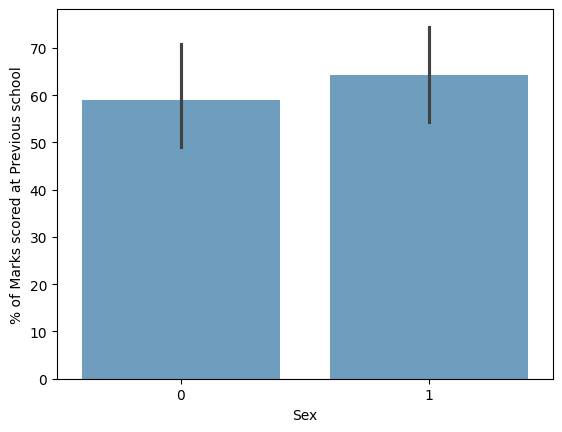

In [43]:
# Sex vs % of Marks scored at Previous school
sns.barplot(x=df['Sex'],y=df['% of Marks scored at Previous school'],alpha=0.7)
plt.show()

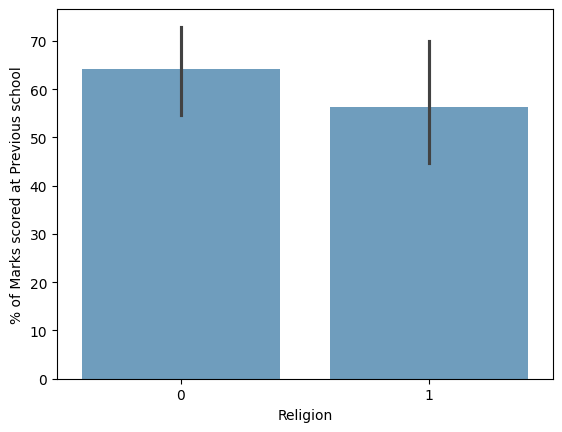

In [45]:
# Religion vs % of Marks scored at Previous school
sns.barplot(x=df['Religion'],y=df['% of Marks scored at Previous school'],alpha=0.7)
plt.show()

In [ ]:
#

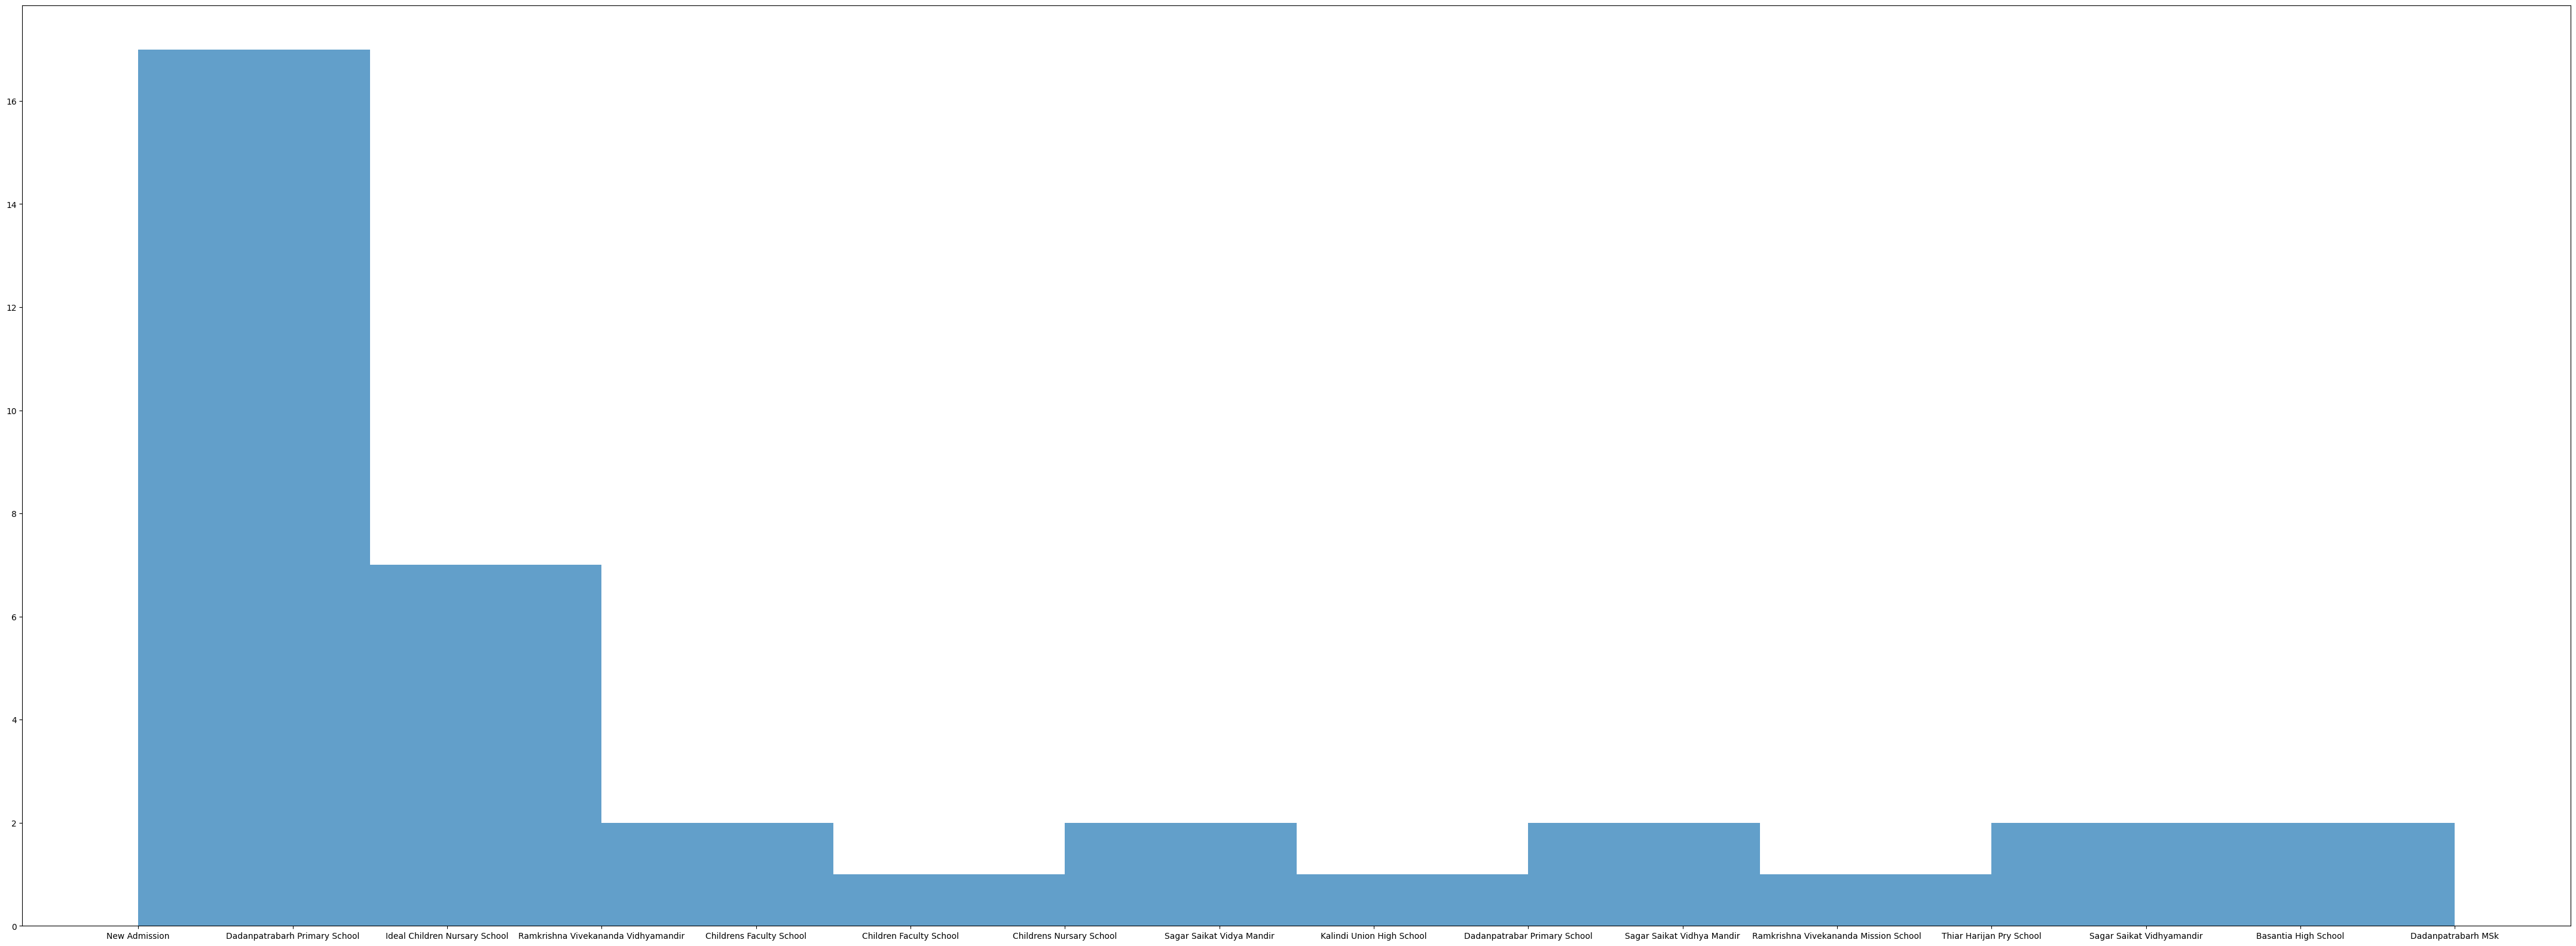

In [50]:
# Histogram of name of school
# Most of schools that take admission in NIGSR-II
plt.figure(figsize=(55,20))
plt.hist(x=df['Previous School Name'],alpha=0.7)
plt.show()

In [51]:
df["Previous School Name"].value_counts()

,count
Previous School Name,
New Admission,14
Ideal Children Nursary School,7
Dadanpatrabarh Primary School,3
Ramkrishna Vivekananda Vidhyamandir,1
Childrens Faculty School,1
Children Faculty School,1
Childrens Nursary School,1
Sagar Saikat Vidya Mandir,1
Kalindi Union High School,1


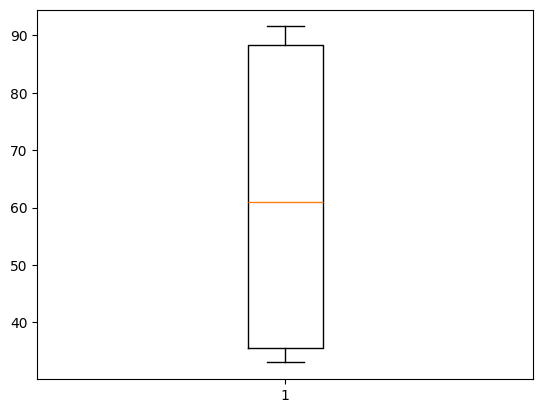

In [52]:
# Box plot for outlayers detection
plt.boxplot(df['% of Marks scored at Previous school'])
plt.show()

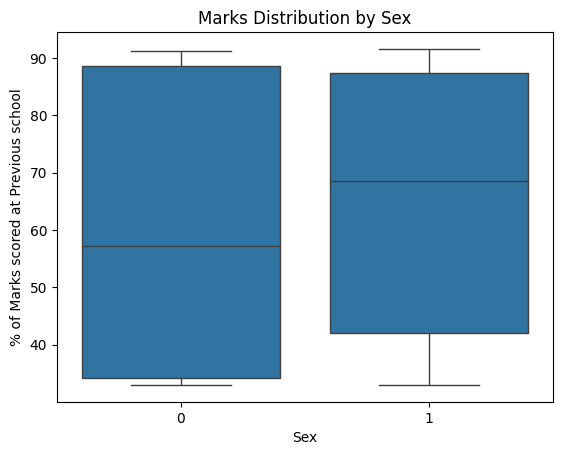

In [56]:
# marks distribution by sex
sns.boxplot(x='Sex', y='% of Marks scored at Previous school',data=df)
plt.title('Marks Distribution by Sex')
plt.show()


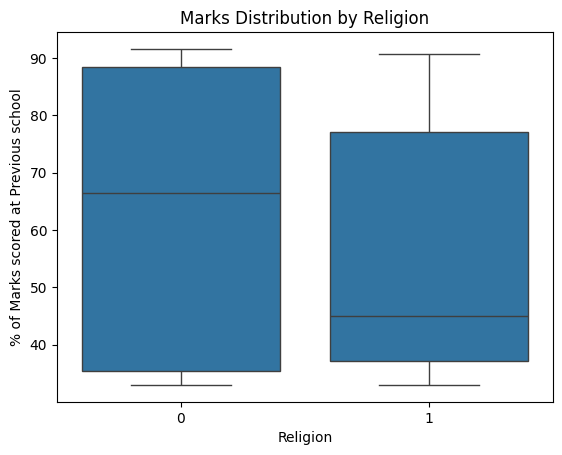

In [57]:
sns.boxplot(x='Religion', y='% of Marks scored at Previous school',data=df)
plt.title('Marks Distribution by Religion')
plt.show()

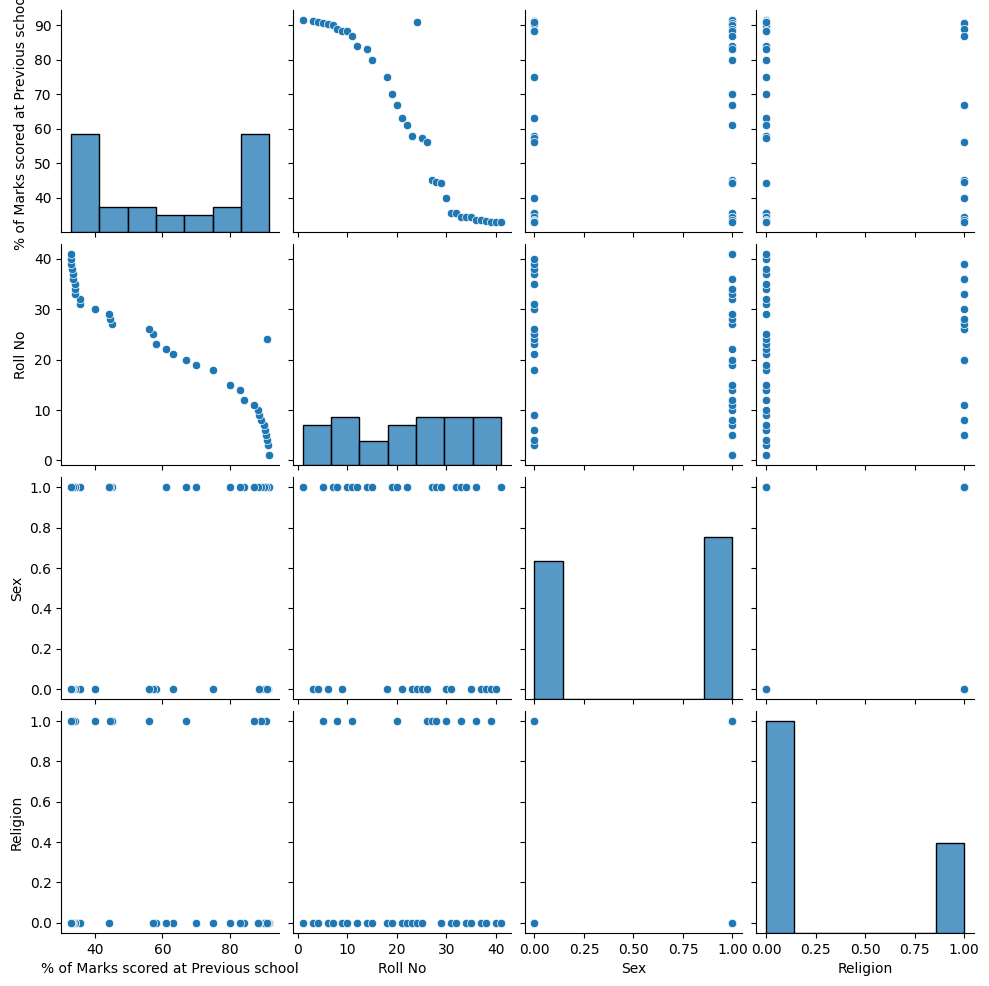

In [58]:
sns.pairplot(df[['% of Marks scored at Previous school', 'Roll No', 'Sex','Religion']])
plt.show()

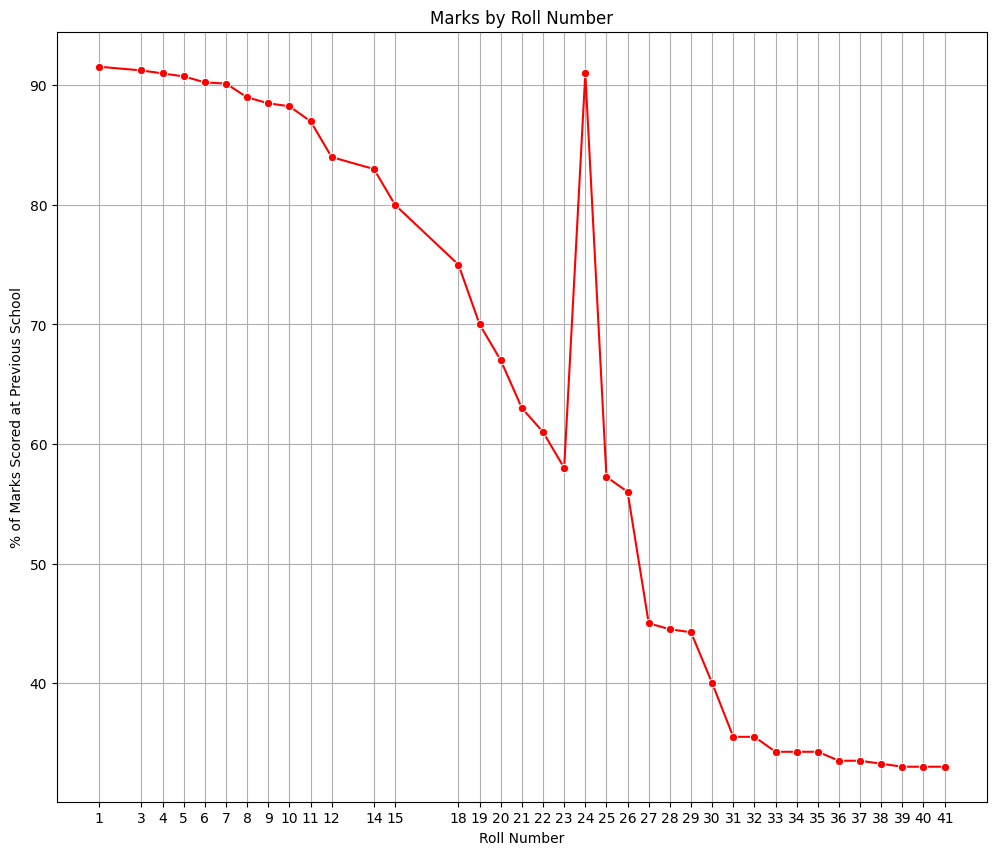

In [77]:
plt.figure(figsize=(12,10))
sns.lineplot(x=df['Roll No'], y=df['% of Marks scored at Previous school'], color='red',marker="o")

plt.title('Marks by Roll Number')
plt.xlabel('Roll Number')
plt.ylabel('% of Marks Scored at Previous School')
plt.xticks(df['Roll No'])
plt.grid(True)

plt.show()

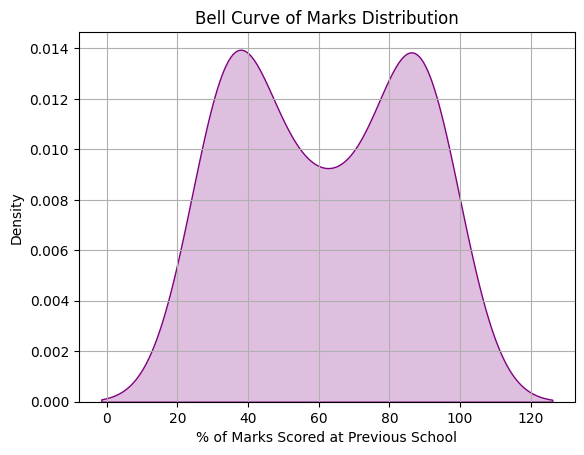

In [69]:
# KDE plot for normalization curve
sns.kdeplot(df['% of Marks scored at Previous school'], fill=True, color='purple')

plt.title('Bell Curve of Marks Distribution')
plt.xlabel('% of Marks Scored at Previous School')
plt.ylabel('Density')
plt.grid(True)
plt.show()

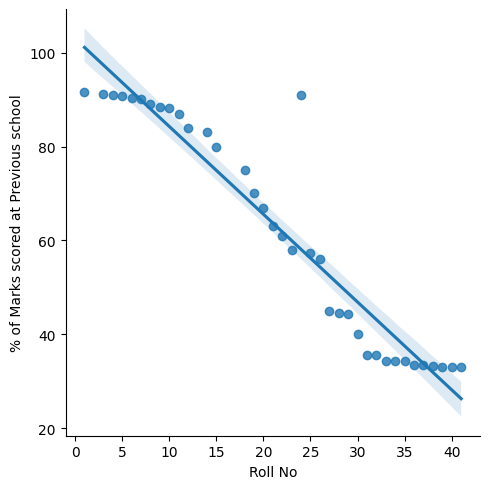

In [79]:
sns.lmplot(x='Roll No', y='% of Marks scored at Previous school', data=df)
plt.show()

# Conclusion

This Exploratory Data Analysis has successfully transformed a raw, unstructured admission dataset into a structured narrative of educational patterns. Key findings include a relatively balanced gender distribution, a predominance of students from Hindu backgrounds, and significant variability in previous academic performance across students. The visualization of academic performance by sex and religion highlights potential socio-cultural influences, while boxplots and KDE curves reveal the spread and normalization of scores.

More importantly, this EDA establishes a foundational model for future, more sophisticated analyses—such as predictive modeling, clustering of student profiles, or even interventions based on demographic predictors. The pipeline developed here demonstrates that with careful preprocessing and thoughtful visualization, even a modest dataset can yield rich, actionable insights.

In essence, this exercise underscores the transformative power of EDA as a bridge between raw educational records and strategic academic foresight.